# CO2 EMISSION

## <font color = 'green'> Business Objective:</font>
### The fundamental goal here is to model the CO2 emissions as a function of several car engine features.

## <font color='purple'><b>Part -1 Analysis :

## 1. Import Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## 2. Import Data

In [2]:
emission_data=pd.read_csv("co2_emissions (1).csv", sep=';')
emission_data.head(15)

make       model vehicle_class  engine_size  cylinders  \
0          ACURA         ILX       COMPACT          2.0          4   
1          ACURA         ILX       COMPACT          2.4          4   
2          ACURA  ILX HYBRID       COMPACT          1.5          4   
3          ACURA     MDX 4WD   SUV - SMALL          3.5          6   
4          ACURA     RDX AWD   SUV - SMALL          3.5          6   
5          ACURA         RLX      MID-SIZE          3.5          6   
6          ACURA          TL      MID-SIZE          3.5          6   
7          ACURA      TL AWD      MID-SIZE          3.7          6   
8          ACURA      TL AWD      MID-SIZE          3.7          6   
9          ACURA         TSX       COMPACT          2.4          4   
10         ACURA         TSX       COMPACT          2.4          4   
11         ACURA         TSX       COMPACT          3.5          6   
12    ALFA ROMEO          4C    TWO-SEATER          1.8          4   
13  ASTON MARTIN         DB9   MINICOMPACT          5.9         12   
14  ASTON MARTIN      RAPIDE    SUBCOMPACT          5.9         12   

   transmission fuel_type  fuel_consumption_city  fuel_consumption_hwy  \
0            AS         Z                    9.9                   6.7   
1             M         Z                   11.2                   7.7   
2            AV         Z                    6.0                   5.8   
3            AS         Z                   12.7                   9.1   
4            AS         Z                   12.1                   8.7   
5            AS         Z                   11.9                   7.7   
6            AS         Z                   11.8                   8.1   
7            AS         Z                   12.8                   9.0   
8             M         Z                   13.4                   9.5   
9            AS         Z                   10.6                   7.5   
10            M         Z                   11.2                   8.1   
11           AS         Z                   12.1                   8.3   
12           AM         Z                    9.7                   6.9   
13            A         Z                   18.0                  12.6   
14            A         Z                   18.0                  12.6   

    fuel_consumption_comb(l/100km)  fuel_consumption_comb(mpg)  co2_emissions  
0                              8.5                          33            196  
1                              9.6                          29            221  
2                              5.9                          48            136  
3                             11.1                          25            255  
4                             10.6                          27            244  
5                             10.0                          28            230  
6                             10.1                          28            232  
7                             11.1                          25            255  
8                             11.6                          24            267  
9                              9.2                          31            212  
10                             9.8                          29            225  
11                            10.4                          27            239  
12                             8.4                          34            193  
13                            15.6                          18            359  
14                            15.6                          18            359

## 3. Data Understanding 

### 3.1 Initial Analysis 

In [3]:
emission_data.shape

(7385, 12)

In [4]:
emission_data.isna().sum()

make                              0
model                             0
vehicle_class                     0
engine_size                       0
cylinders                         0
transmission                      0
fuel_type                         0
fuel_consumption_city             0
fuel_consumption_hwy              0
fuel_consumption_comb(l/100km)    0
fuel_consumption_comb(mpg)        0
co2_emissions                     0
dtype: int64

In [5]:
emission_data.dtypes

make                               object
model                              object
vehicle_class                      object
engine_size                       float64
cylinders                           int64
transmission                       object
fuel_type                          object
fuel_consumption_city             float64
fuel_consumption_hwy              float64
fuel_consumption_comb(l/100km)    float64
fuel_consumption_comb(mpg)          int64
co2_emissions                       int64
dtype: object

In [6]:
emission_data.duplicated().sum()

1112

In [7]:
emission_data.describe(include='all')

make          model vehicle_class  engine_size    cylinders  \
count   7385           7385          7385  7385.000000  7385.000000   
unique    42           2053            16          NaN          NaN   
top     FORD  F-150 FFV 4X4   SUV - SMALL          NaN          NaN   
freq     628             32          1217          NaN          NaN   
mean     NaN            NaN           NaN     3.160068     5.615030   
std      NaN            NaN           NaN     1.354170     1.828307   
min      NaN            NaN           NaN     0.900000     3.000000   
25%      NaN            NaN           NaN     2.000000     4.000000   
50%      NaN            NaN           NaN     3.000000     6.000000   
75%      NaN            NaN           NaN     3.700000     6.000000   
max      NaN            NaN           NaN     8.400000    16.000000   

       transmission fuel_type  fuel_consumption_city  fuel_consumption_hwy  \
count          7385      7385            7385.000000           7385.000000   
unique            5         5                    NaN                   NaN   
top              AS         X                    NaN                   NaN   
freq           3127      3637                    NaN                   NaN   
mean            NaN       NaN              12.556534              9.041706   
std             NaN       NaN               3.500274              2.224456   
min             NaN       NaN               4.200000              4.000000   
25%             NaN       NaN              10.100000              7.500000   
50%             NaN       NaN              12.100000              8.700000   
75%             NaN       NaN              14.600000             10.200000   
max             NaN       NaN              30.600000             20.600000   

        fuel_consumption_comb(l/100km)  fuel_consumption_comb(mpg)  \
count                      7385.000000                 7385.000000   
unique                             NaN                         NaN   
top                                NaN                         NaN   
freq                               NaN                         NaN   
mean                         10.975071                   27.481652   
std                           2.892506                    7.231879   
min                           4.100000                   11.000000   
25%                           8.900000                   22.000000   
50%                          10.600000                   27.000000   
75%                          12.600000                   32.000000   
max                          26.100000                   69.000000   

        co2_emissions  
count     7385.000000  
unique            NaN  
top               NaN  
freq              NaN  
mean       250.584699  
std         58.512679  
min         96.000000  
25%        208.000000  
50%        246.000000  
75%        288.000000  
max        522.000000

## 3.2 Data Visualization

#### For Categorical Data

In [8]:
categorical_features=emission_data.select_dtypes(include='object')
categorical_features.head()

make       model vehicle_class transmission fuel_type
0  ACURA         ILX       COMPACT           AS         Z
1  ACURA         ILX       COMPACT            M         Z
2  ACURA  ILX HYBRID       COMPACT           AV         Z
3  ACURA     MDX 4WD   SUV - SMALL           AS         Z
4  ACURA     RDX AWD   SUV - SMALL           AS         Z

In [9]:
for count in categorical_features:
    print(count,'\n')
    print(emission_data[count].value_counts())
    print('-----------------------------\n')

make 

FORD             628
CHEVROLET        588
BMW              527
MERCEDES-BENZ    419
PORSCHE          376
TOYOTA           330
GMC              328
AUDI             286
NISSAN           259
JEEP             251
DODGE            246
KIA              231
HONDA            214
HYUNDAI          210
MINI             204
VOLKSWAGEN       197
MAZDA            180
LEXUS            178
JAGUAR           160
CADILLAC         158
SUBARU           140
VOLVO            124
INFINITI         108
BUICK            103
RAM               97
LINCOLN           96
MITSUBISHI        95
CHRYSLER          88
LAND ROVER        85
FIAT              73
ACURA             72
MASERATI          61
ROLLS-ROYCE       50
ASTON MARTIN      47
BENTLEY           46
LAMBORGHINI       41
ALFA ROMEO        30
GENESIS           25
SCION             22
SMART              7
BUGATTI            3
SRT                2
Name: make, dtype: int64
-----------------------------

model 

F-150 FFV 4X4           32
F-150 FFV           

###### Count Plot 

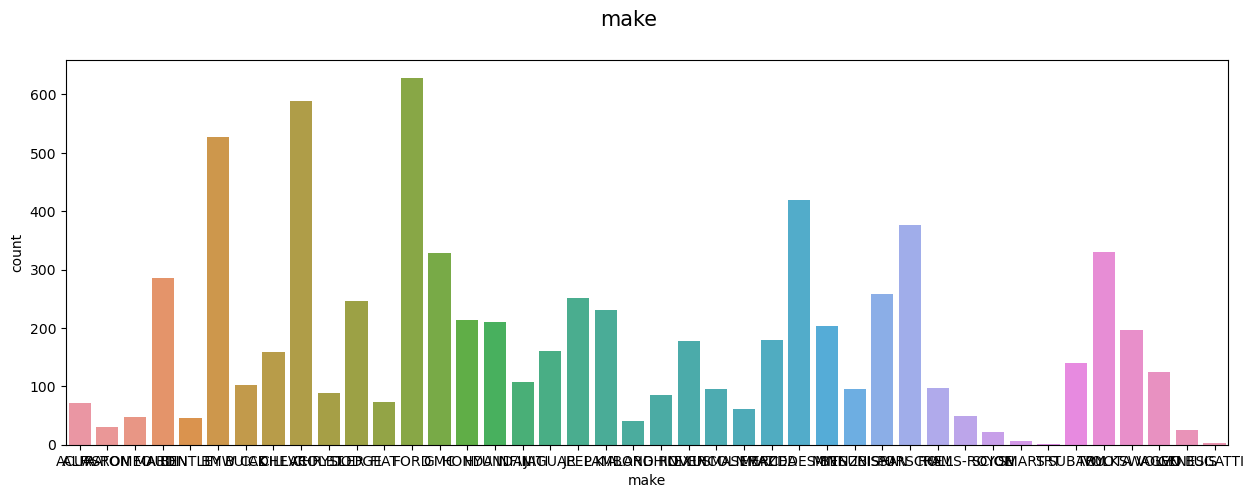


--------------------------------------------------------------------------------------------------------------


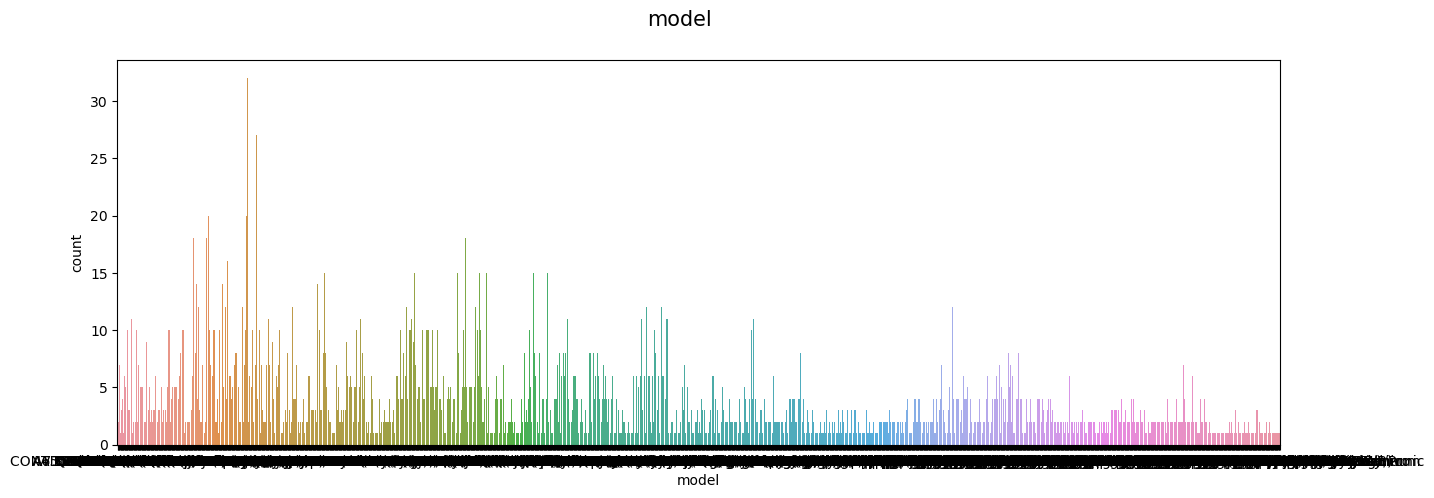


--------------------------------------------------------------------------------------------------------------


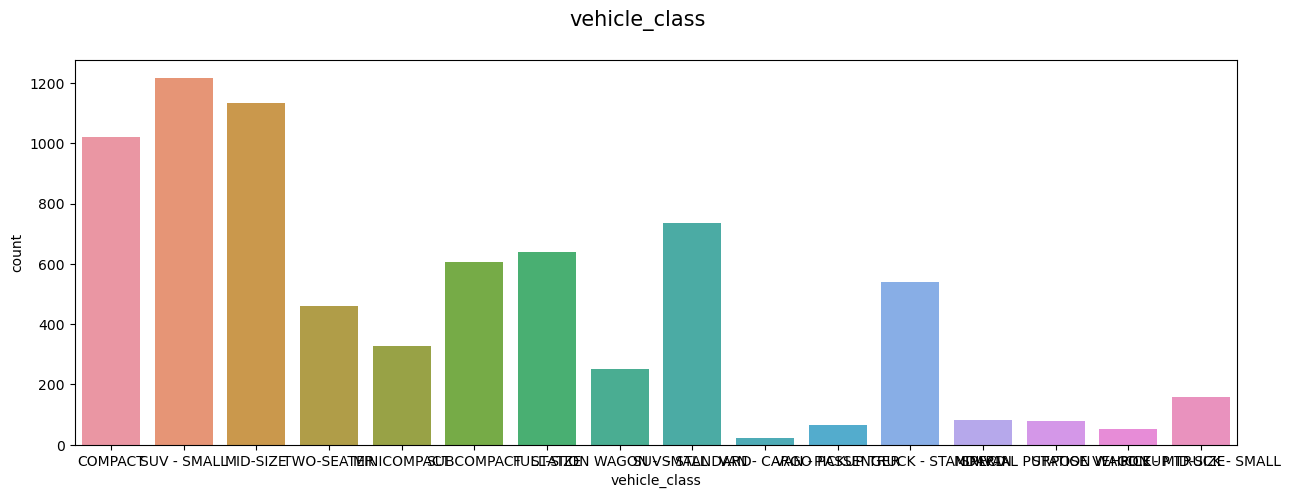


--------------------------------------------------------------------------------------------------------------


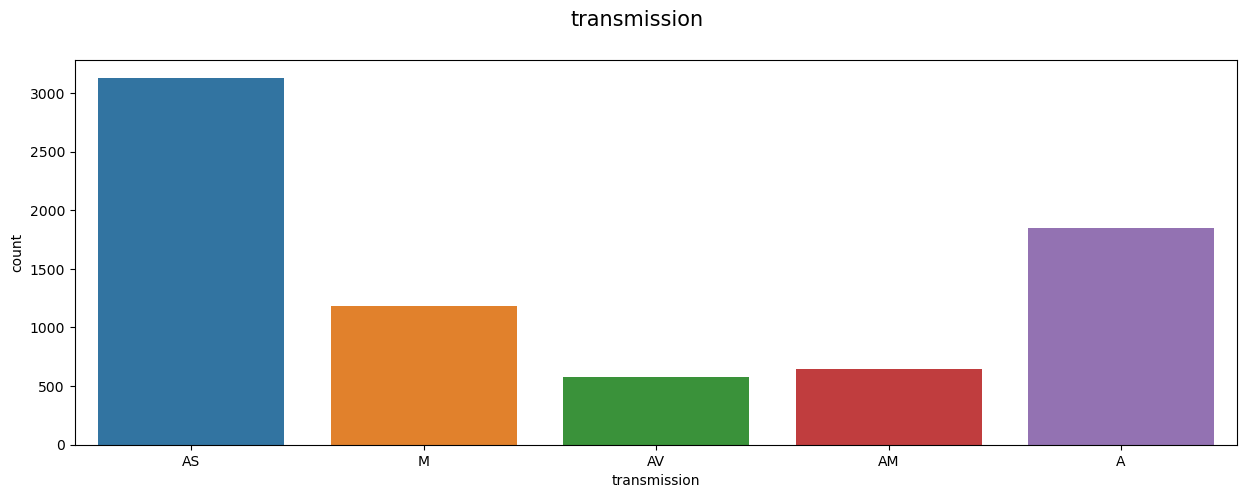


--------------------------------------------------------------------------------------------------------------


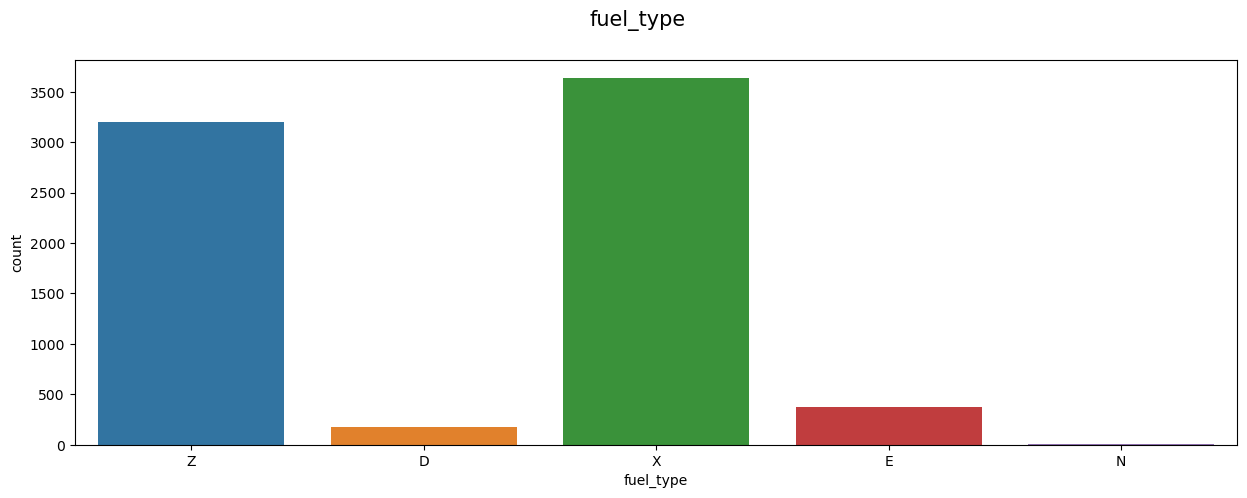


--------------------------------------------------------------------------------------------------------------


In [10]:
for plot in categorical_features:
    plt.figure(figsize=(15,5))
    sns.countplot(x=emission_data[plot], data= emission_data)
    plt.suptitle(plot, size=15)
    plt.show()
    print('\n--------------------------------------------------------------------------------------------------------------')


#### For Quantitative Data

In [11]:
quantitative_features=emission_data.select_dtypes(exclude='object')
quantitative_features.head()

engine_size  cylinders  fuel_consumption_city  fuel_consumption_hwy  \
0          2.0          4                    9.9                   6.7   
1          2.4          4                   11.2                   7.7   
2          1.5          4                    6.0                   5.8   
3          3.5          6                   12.7                   9.1   
4          3.5          6                   12.1                   8.7   

   fuel_consumption_comb(l/100km)  fuel_consumption_comb(mpg)  co2_emissions  
0                             8.5                          33            196  
1                             9.6                          29            221  
2                             5.9                          48            136  
3                            11.1                          25            255  
4                            10.6                          27            244

###### Box Plot and Distributuion plot

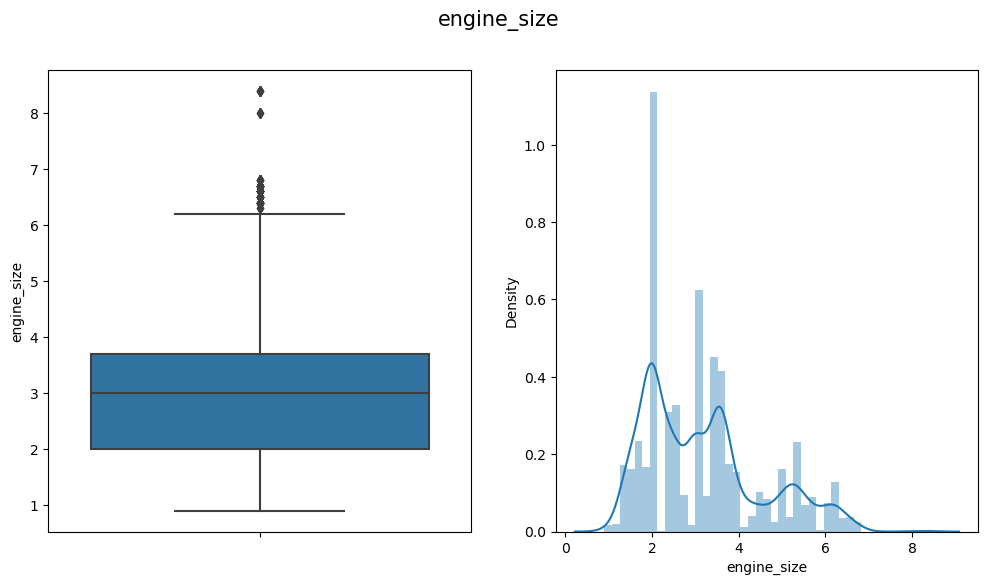

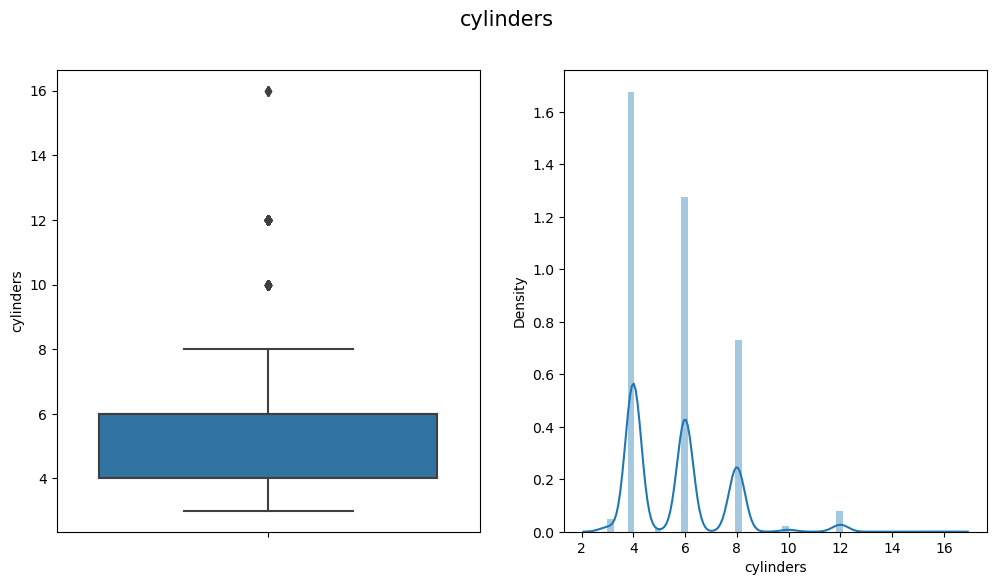

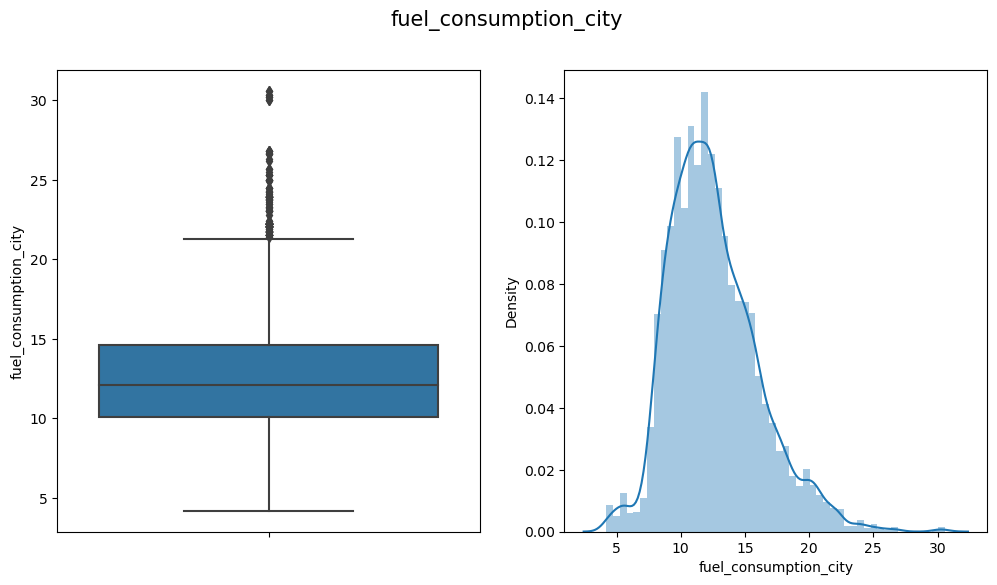

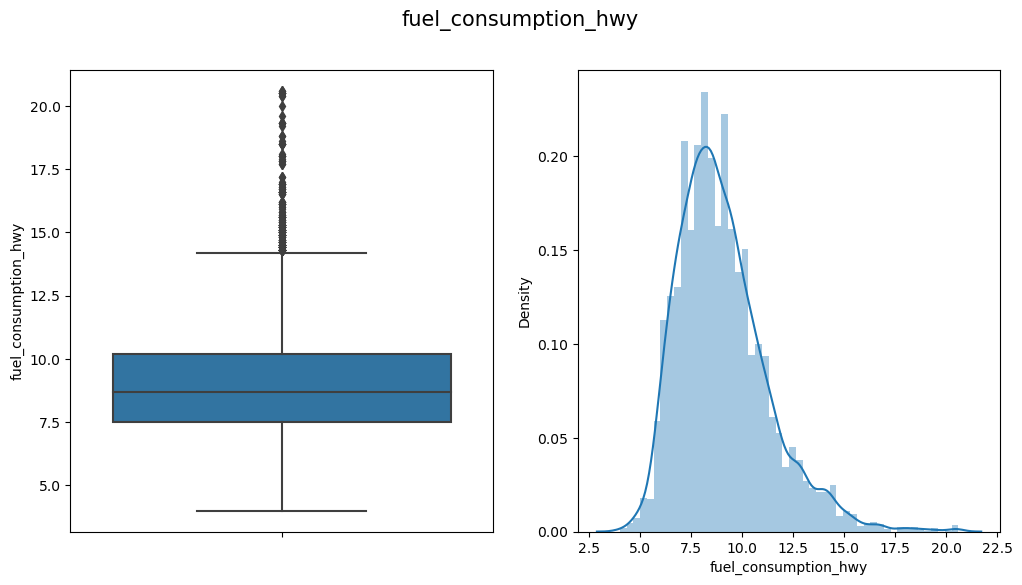

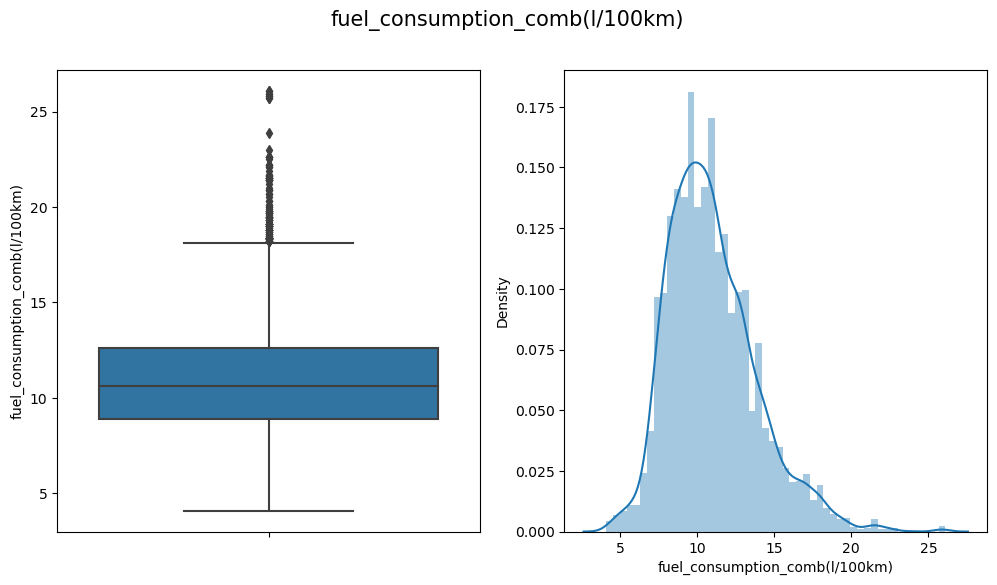

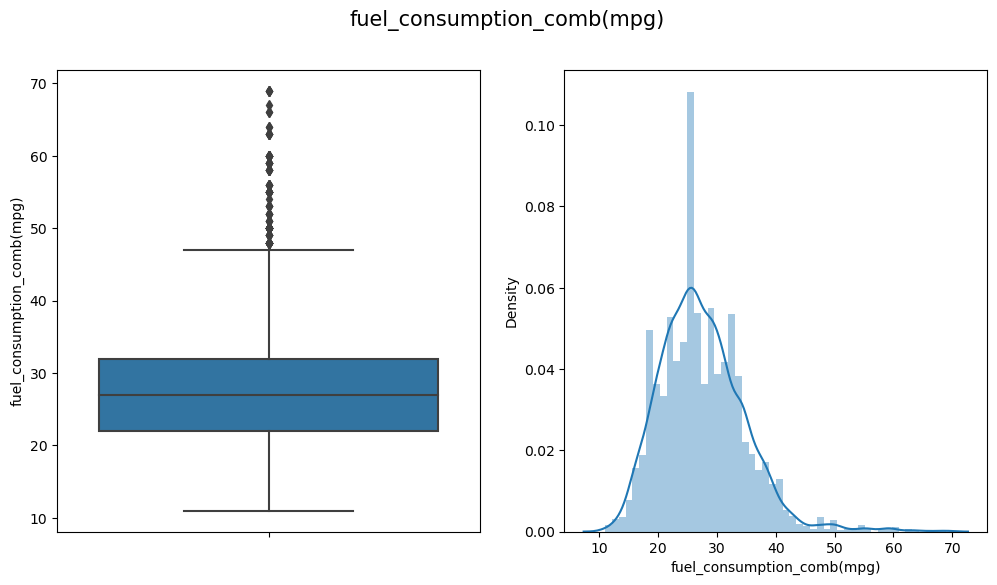

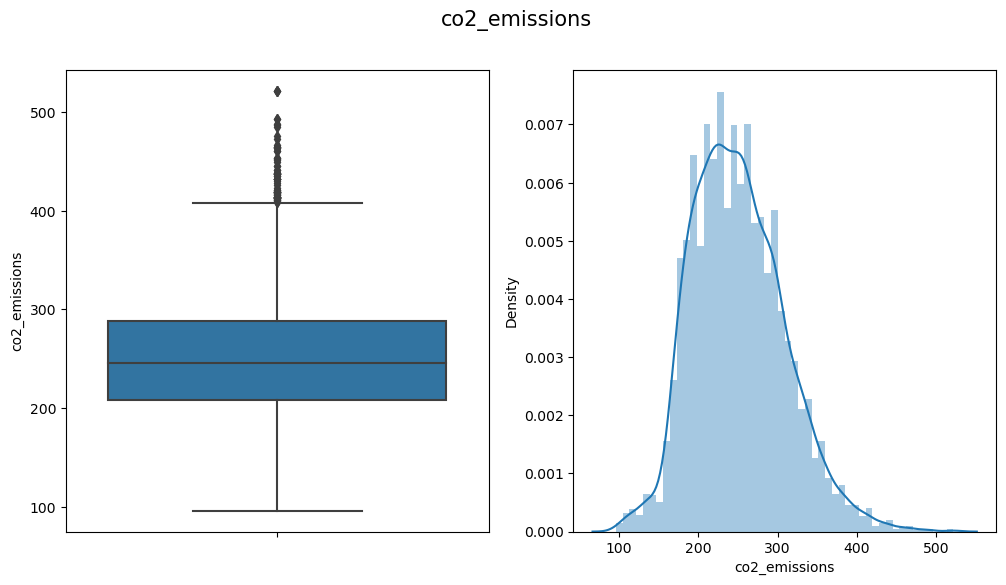

In [12]:
for i in quantitative_features:
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    sns.boxplot(y=i,data=emission_data)
    plt.subplot(1,2,2)
    sns.distplot(a=emission_data[i])
    plt.suptitle(i, size=15)
    plt.show()

###### Scatter plot: Each X variable vs Y variable

<Figure size 600x600 with 0 Axes>

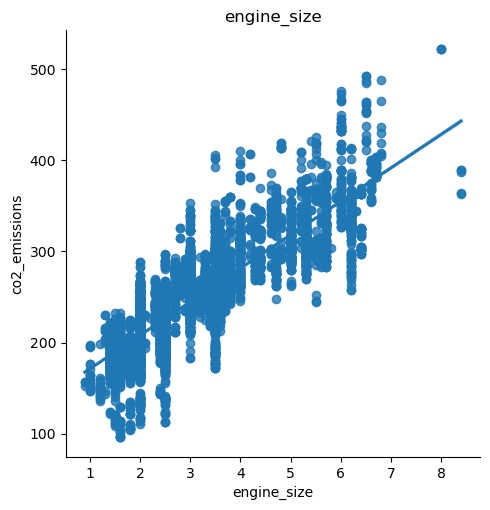


---------------------------------------------------------------------------------------------------------------


<Figure size 600x600 with 0 Axes>

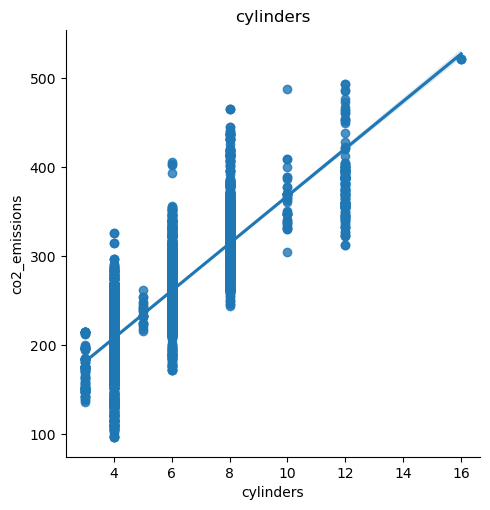


---------------------------------------------------------------------------------------------------------------


<Figure size 600x600 with 0 Axes>

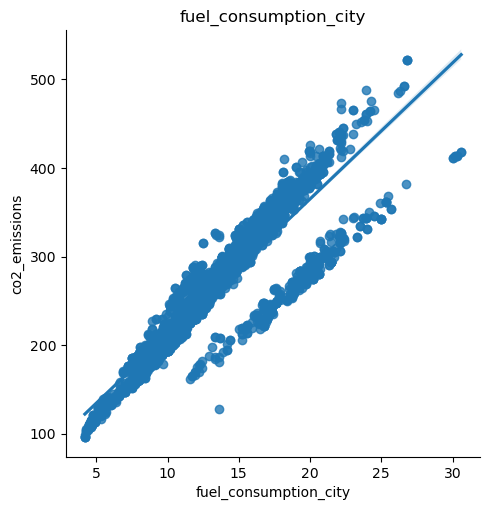


---------------------------------------------------------------------------------------------------------------


<Figure size 600x600 with 0 Axes>

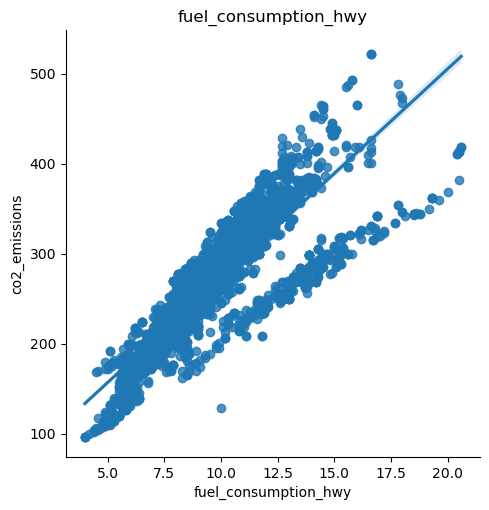


---------------------------------------------------------------------------------------------------------------


<Figure size 600x600 with 0 Axes>

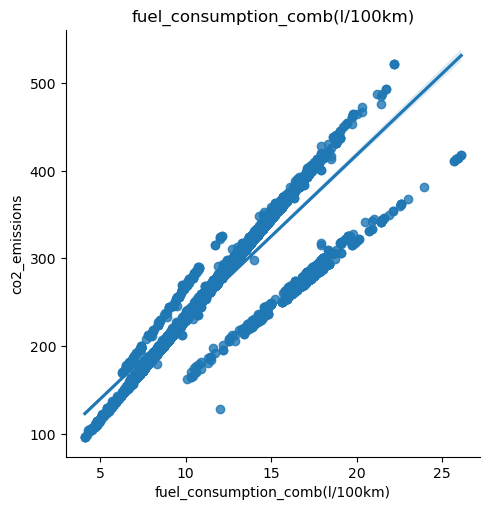


---------------------------------------------------------------------------------------------------------------


<Figure size 600x600 with 0 Axes>

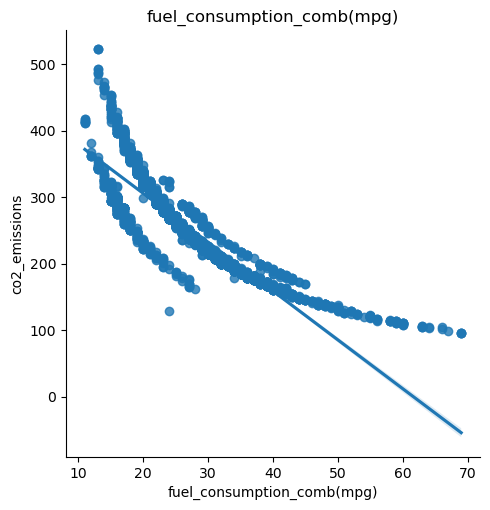


---------------------------------------------------------------------------------------------------------------


<Figure size 600x600 with 0 Axes>

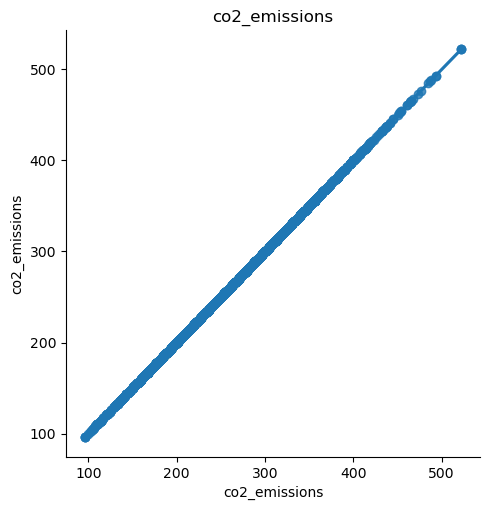


---------------------------------------------------------------------------------------------------------------


In [13]:
for i in quantitative_features:
    plt.figure(figsize=(6,6))
    sns.lmplot(x=i, y='co2_emissions', data=emission_data)
    plt.title(i)
    plt.show()
    print('\n---------------------------------------------------------------------------------------------------------------')

###### Scatter-Matrix

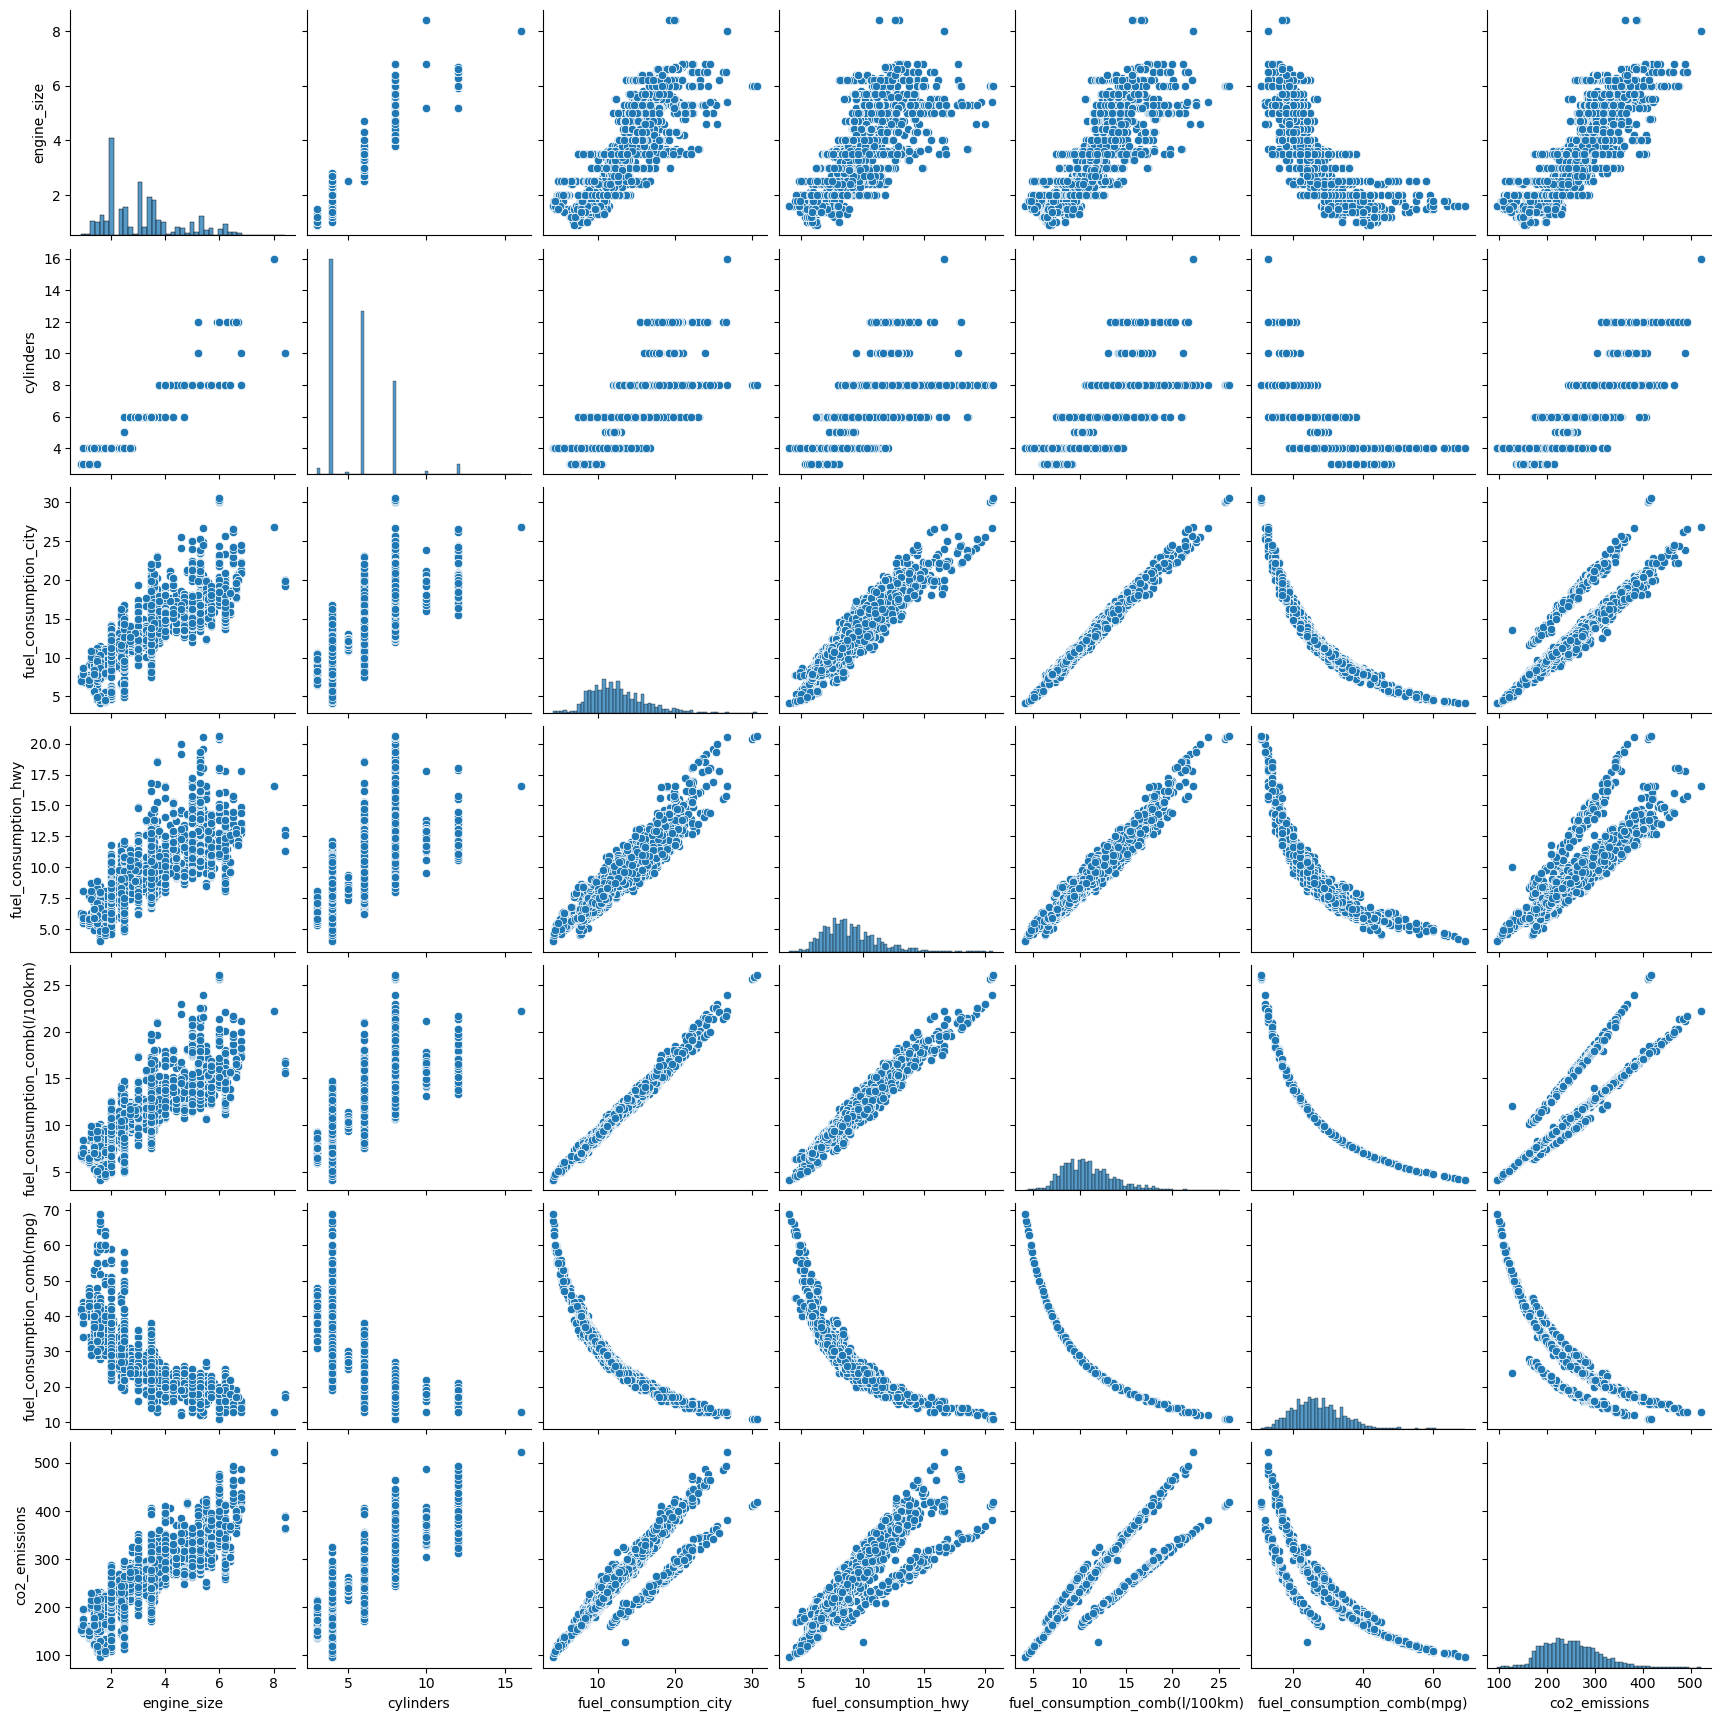

In [14]:
sns.pairplot(emission_data)
plt.show()

###### Correlation and its Heat Map

In [15]:
correlation_data=emission_data.corr().round(2)
correlation_data

engine_size  cylinders  fuel_consumption_city  \
engine_size                            1.00       0.93                   0.83   
cylinders                              0.93       1.00                   0.80   
fuel_consumption_city                  0.83       0.80                   1.00   
fuel_consumption_hwy                   0.76       0.72                   0.95   
fuel_consumption_comb(l/100km)         0.82       0.78                   0.99   
fuel_consumption_comb(mpg)            -0.76      -0.72                  -0.93   
co2_emissions                          0.85       0.83                   0.92   

                                fuel_consumption_hwy  \
engine_size                                     0.76   
cylinders                                       0.72   
fuel_consumption_city                           0.95   
fuel_consumption_hwy                            1.00   
fuel_consumption_comb(l/100km)                  0.98   
fuel_consumption_comb(mpg)                     -0.89   
co2_emissions                                   0.88   

                                fuel_consumption_comb(l/100km)  \
engine_size                                               0.82   
cylinders                                                 0.78   
fuel_consumption_city                                     0.99   
fuel_consumption_hwy                                      0.98   
fuel_consumption_comb(l/100km)                            1.00   
fuel_consumption_comb(mpg)                               -0.93   
co2_emissions                                             0.92   

                                fuel_consumption_comb(mpg)  co2_emissions  
engine_size                                          -0.76           0.85  
cylinders                                            -0.72           0.83  
fuel_consumption_city                                -0.93           0.92  
fuel_consumption_hwy                                 -0.89           0.88  
fuel_consumption_comb(l/100km)                       -0.93           0.92  
fuel_consumption_comb(mpg)                            1.00          -0.91  
co2_emissions                                        -0.91           1.00

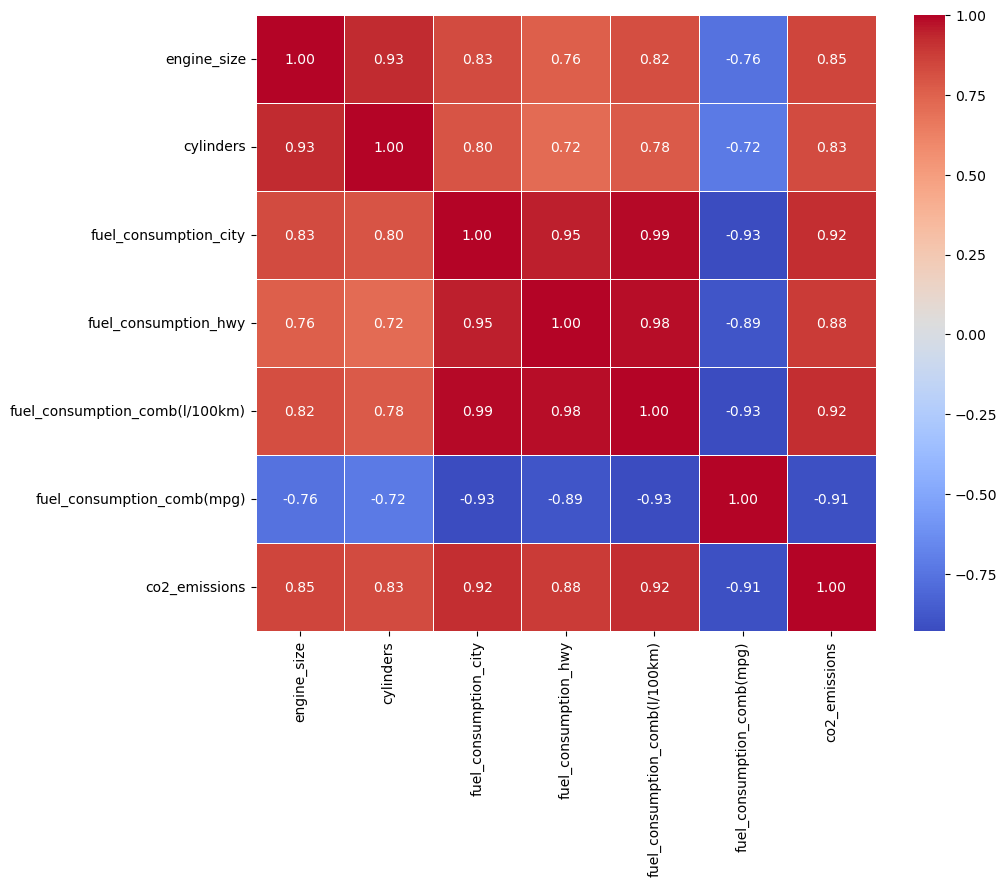

In [16]:
plt.rcParams['figure.figsize']=(10,8)
sns.heatmap(correlation_data, cmap='coolwarm', linewidth=0.5, fmt='0.2f', annot=True)
plt.show()

## Auto EDA

In [17]:
import ydata_profiling as pp

In [18]:
EDA_report=pp.ProfileReport(emission_data, title='Co2 Emission')
EDA_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [19]:
EDA_report.to_file(output_file='report.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Conclusion:

From the data we came to know that 
- There are some dupluicate values in the dataset
- There are no null values
- Quantitative data consists of outliers
- There is multicollinearity problem in the data